In [15]:
!pip install statsmodels


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = "C:/Users/MAYANK PUVVALA/Downloads/Brent Spot Price.csv"
df = pd.read_csv(file_path)

df

,Unnamed: 0,"Brent crude oil spot price, Monthly (dollars per barrel)"
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352
...,...,...
391,2022 08,60.000
392,2022 09,60.000
393,2022 10,61.000
394,2022 11,61.000


In [17]:

# Convert 'Date' column to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Date', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Extract year and month from the index and create a new column 'YearMonth'
df['YearMonth'] = df.index.to_period('M').astype(str)

# Aggregate data by 'YearMonth' to handle any duplicate entries (if present)
df = df.groupby('YearMonth').mean()
df

C:\Users\MAYANK PUVVALA\AppData\Local\Temp\ipykernel_8932\1284920937.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Unnamed: 0'])


,"Brent crude oil spot price, Monthly (dollars per barrel)"
YearMonth,
1990-01,21.251
1990-02,19.813
1990-03,18.387
1990-04,16.612
1990-05,16.352
...,...
2022-08,60.000
2022-09,60.000
2022-10,61.000


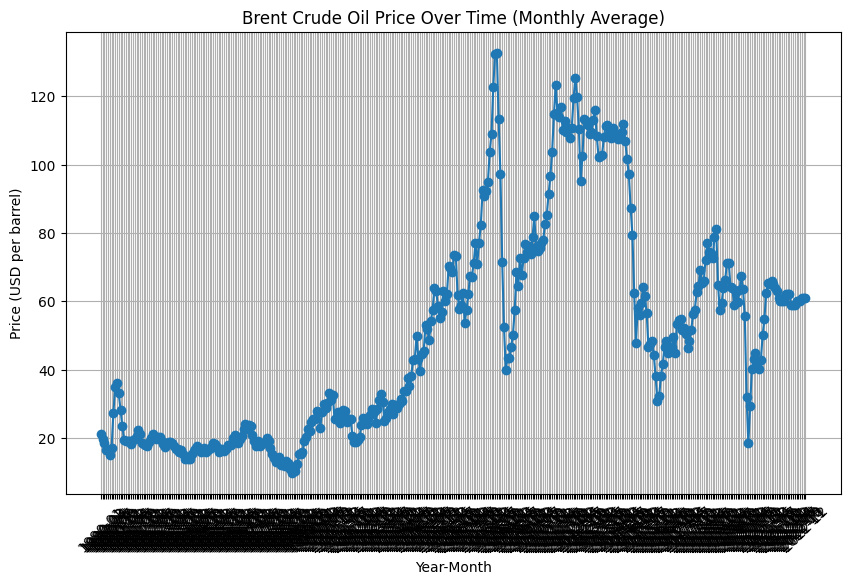

In [40]:

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Brent crude oil spot price, Monthly (dollars per barrel)'], marker='o')
plt.title('Brent Crude Oil Price Over Time (Monthly Average)')
plt.xlabel('Year-Month')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Decompose the time series to visualize trend and seasonality
decomposition = seasonal_decompose(df['Brent crude oil spot price, Monthly (dollars per barrel)'], model='additive', period=12)  # Specify period as 12 months (annual seasonality)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition components
plt.figure(figsize=(120, 80))
plt.subplot(411)
plt.plot(df.index, df['Brent crude oil spot price, Monthly (dollars per barrel)'], label='Original', marker='o')
plt.legend(loc='upper left')
plt.title('Decomposition of Brent Crude Oil Price (Monthly Average)')
plt.subplot(412)
plt.plot(df.index, trend, label='Trend', marker='o')
plt.legend(loc='upper left')
plt.title('Trend')
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonality', marker='o')
plt.legend(loc='upper left')
plt.title('Seasonality')
plt.subplot(414)
plt.plot(df.index, residual, label='Residuals', marker='o')
plt.legend(loc='upper left')
plt.title('Residuals')
plt.tight_layout()
plt.show()


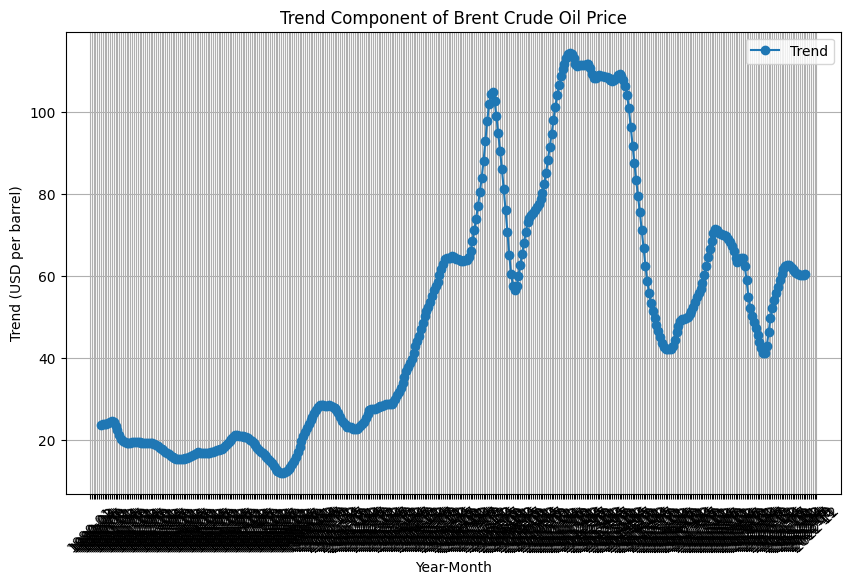

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, trend, label='Trend', marker='o')
plt.title('Trend Component of Brent Crude Oil Price')
plt.xlabel('Year-Month')
plt.ylabel('Trend (USD per barrel)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()


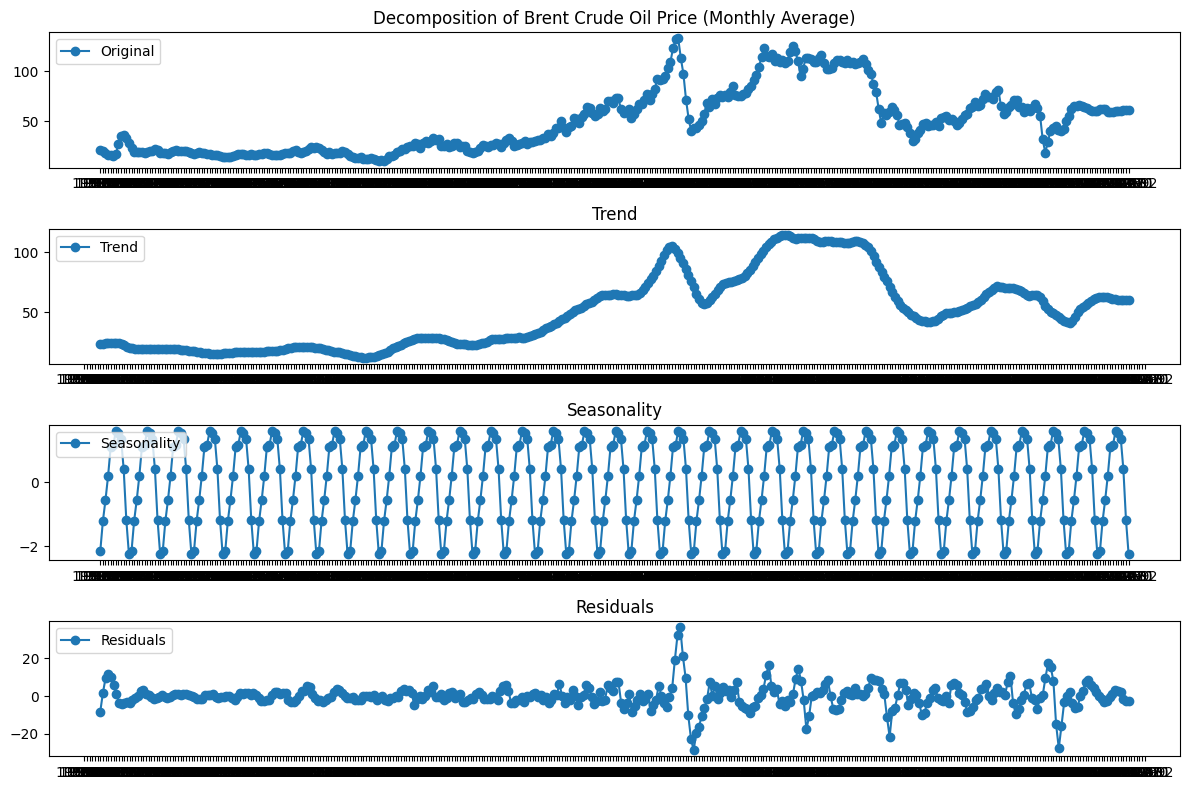

In [41]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['Brent crude oil spot price, Monthly (dollars per barrel)'], label='Original', marker='o')
plt.legend(loc='upper left')
plt.title('Decomposition of Brent Crude Oil Price (Monthly Average)')
plt.subplot(412)
plt.plot(df.index, trend, label='Trend', marker='o')
plt.legend(loc='upper left')
plt.title('Trend')
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonality', marker='o')
plt.legend(loc='upper left')
plt.title('Seasonality')
plt.subplot(414)
plt.plot(df.index, residual, label='Residuals', marker='o')
plt.legend(loc='upper left')
plt.title('Residuals')
plt.tight_layout()
plt.show()

C:\Users\MAYANK PUVVALA\AppData\Local\Temp\ipykernel_11028\1067679985.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Unnamed: 0'])
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

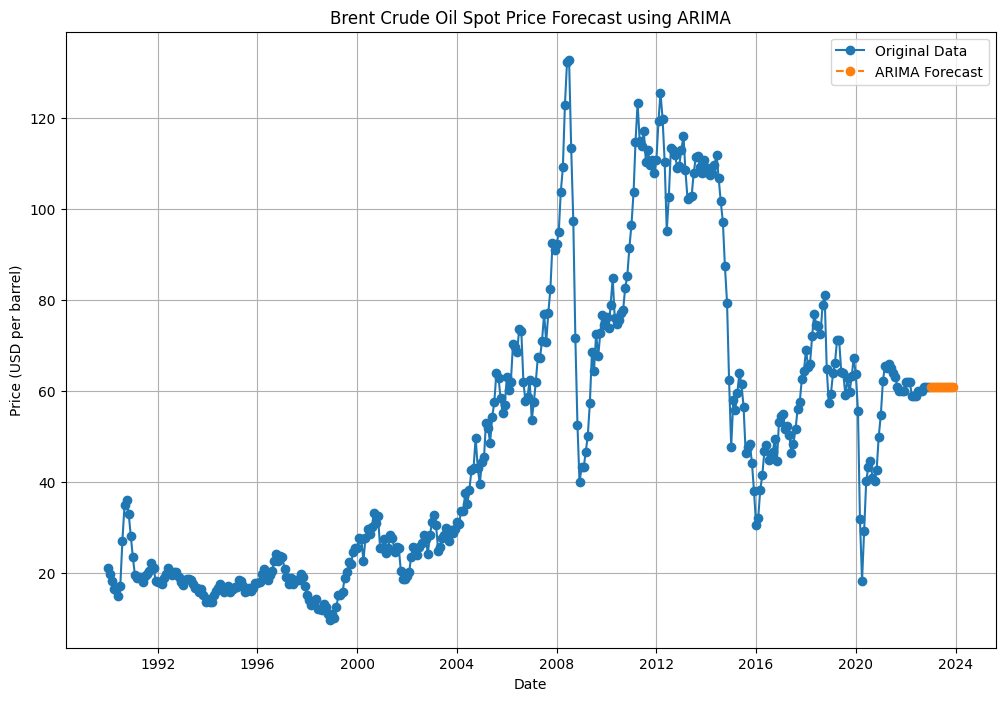

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the dataset
file_path = "C:/Users/MAYANK PUVVALA/Downloads/Brent Spot Price.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Date', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Fit ARIMA model
model_arima = ARIMA(df, order=(5, 1, 0))  # Example: ARIMA(p=5, d=1, q=0)
model_arima_fit = model_arima.fit()

# Forecast future values
forecast_steps = 12  # Number of steps (months) to forecast
forecast_arima = model_arima_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Brent crude oil spot price, Monthly (dollars per barrel)'], label='Original Data', marker='o')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), forecast_arima, label='ARIMA Forecast', linestyle='--', marker='o')
plt.title('Brent Crude Oil Spot Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.show()


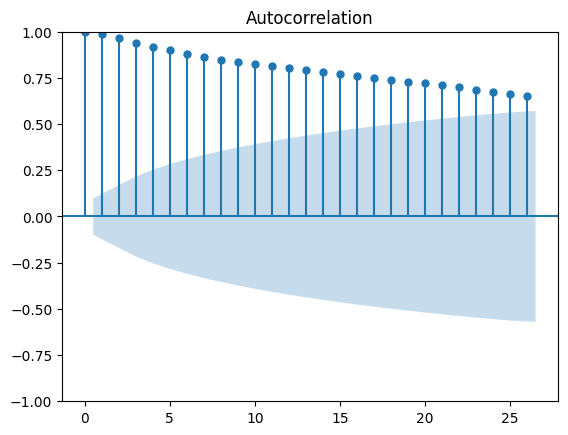

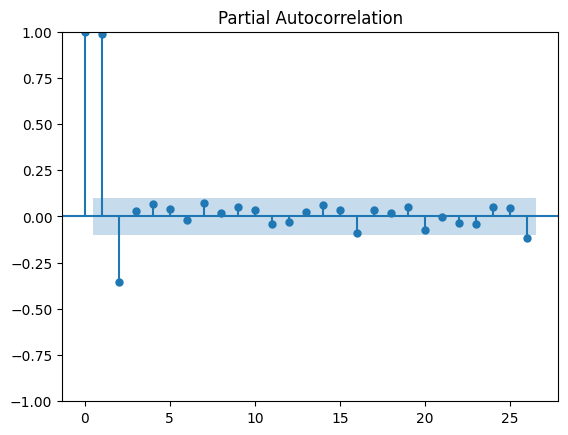

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plot_acf(df['Brent crude oil spot price, Monthly (dollars per barrel)'])
plot_pacf(df['Brent crude oil spot price, Monthly (dollars per barrel)'])
plt.show()


In [4]:
import itertools
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for clearer output

# Define the range of parameters to search (example ranges)
p_values = range(0, 3)  # AR parameter
d_values = range(0, 2)  # Differencing parameter
q_values = range(0, 3)  # MA parameter
P_values = range(0, 2)  # Seasonal AR parameter
D_values = range(0, 2)  # Seasonal differencing parameter
Q_values = range(0, 2)  # Seasonal MA parameter
s_values = [12]         # Seasonal period (e.g., 12 for monthly data)

# Generate all possible combinations of parameters
param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values))

# Perform grid search for SARIMA parameters
best_aic = float('inf')
best_params = None

for params in param_combinations:
    try:
        model = SARIMAX(df['Brent crude oil spot price, Monthly (dollars per barrel)'],
                        order=(params[0], params[1], params[2]),
                        seasonal_order=(params[3], params[4], params[5], s_values[0]))
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = params
    except:
        continue

print("Best SARIMA Parameters:", best_params)
print("Best AIC:", best_aic)


Best SARIMA Parameters: (2, 1, 1, 0, 1, 1)
Best AIC: 2282.161425309984


C:\Users\MAYANK PUVVALA\AppData\Local\Temp\ipykernel_11028\1060645167.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Unnamed: 0'])
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MAYANK PUVVALA\AppData\Local\Temp\ipykernel_11028\1060645167.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], per

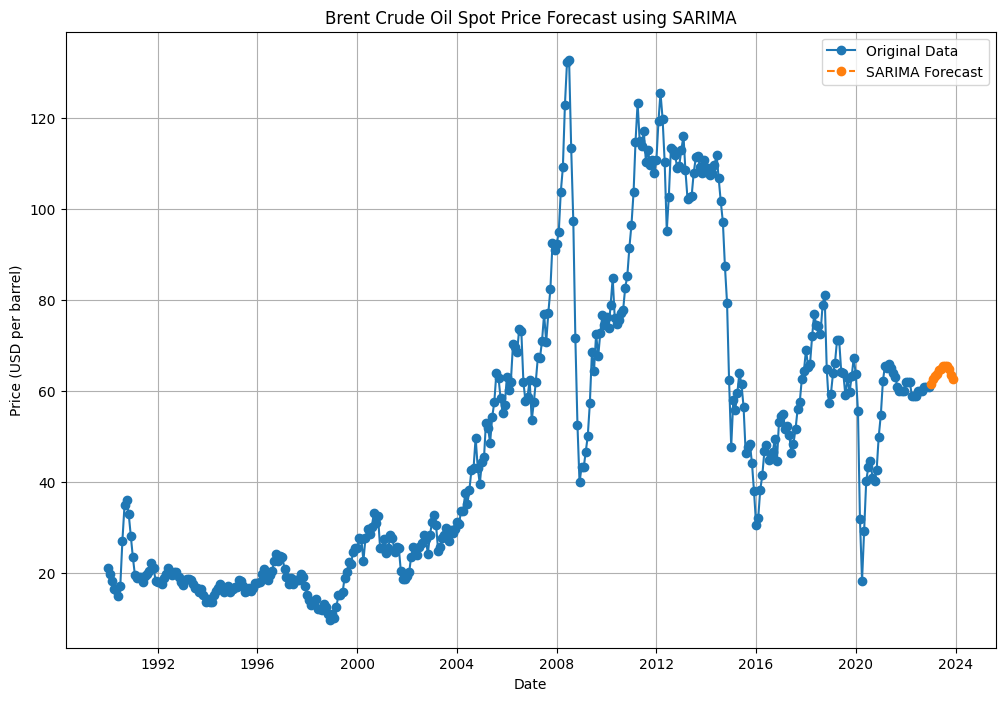

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and preprocess the dataset
file_path = "C:/Users/MAYANK PUVVALA/Downloads/Brent Spot Price.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index('Date', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Fit SARIMA model
model_sarima = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example: SARIMA(p=1, d=1, q=1)(P=1, D=1, Q=1, s=12)
model_sarima_fit = model_sarima.fit()

# Forecast future values
forecast_steps = 12  # Number of steps (months) to forecast
forecast_sarima = model_sarima_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Brent crude oil spot price, Monthly (dollars per barrel)'], label='Original Data', marker='o')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), forecast_sarima, label='SARIMA Forecast', linestyle='--', marker='o')
plt.title('Brent Crude Oil Spot Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.show()


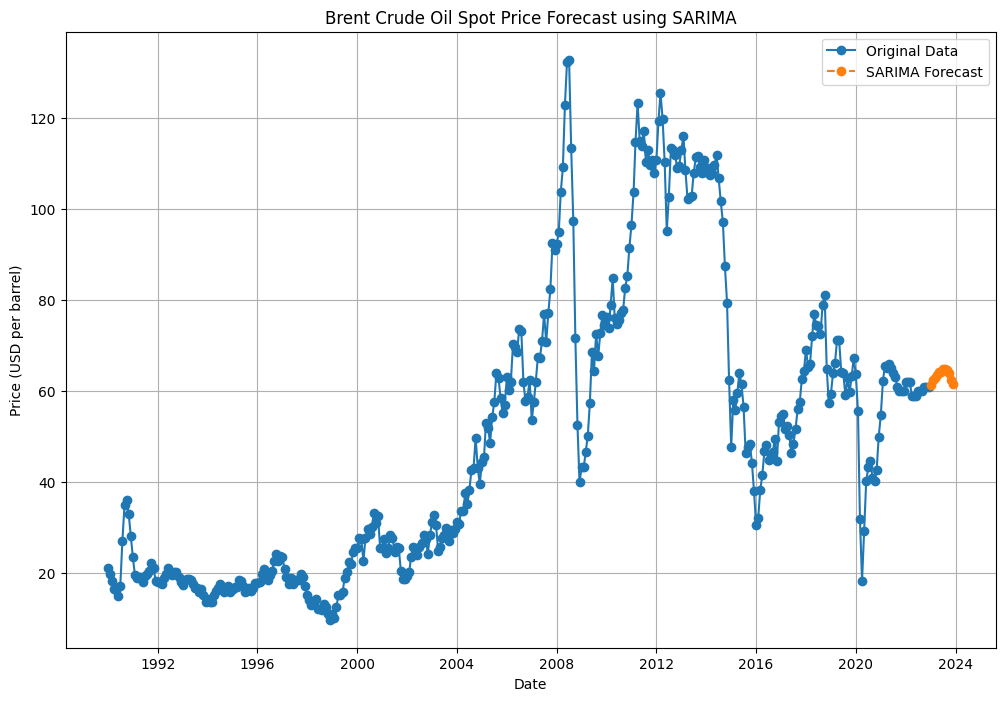

In [5]:
p, d, q, P, D, Q, s = (2, 1, 1, 0, 1, 1, 12)  # Best SARIMA parameters
model_sarima = SARIMAX(df['Brent crude oil spot price, Monthly (dollars per barrel)'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s))

# Fit SARIMA model
model_sarima_fit = model_sarima.fit()


# Forecast future values
forecast_steps = 12  # Number of steps (months) to forecast
forecast_sarima = model_sarima_fit.forecast(steps=forecast_steps)

# Plot original data and forecast
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Brent crude oil spot price, Monthly (dollars per barrel)'], label='Original Data', marker='o')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps, freq='M'), forecast_sarima, label='SARIMA Forecast', linestyle='--', marker='o')
plt.title('Brent Crude Oil Spot Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid(True)
plt.show()